# **Step 1: Notebook to Create ML Model**
Predict **fetal health** given various measurements

In [28]:
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Packages for implementing AdaBoost and Soft Voting
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report, f1_score

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

In [29]:
# Load dataset as dataframe
fetal_df = pd.read_csv('fetal_health.csv')
fetal_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [30]:
# Dropping null values
fetal_df.dropna(inplace = True)         # .info tells us they're all floats

In [31]:
# Select input and output features
X = fetal_df.drop(columns = ['fetal_health'])
y = fetal_df['fetal_health']

In [32]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 1) 

# Defining prediction model
clf = DecisionTreeClassifier(random_state = 0)
clf.classes_ = ["Normal", "Suspect", "Pathological"]

# Fitting model on training data
clf.fit(train_X, train_y)

DecisionTreeClassifier(random_state=0)

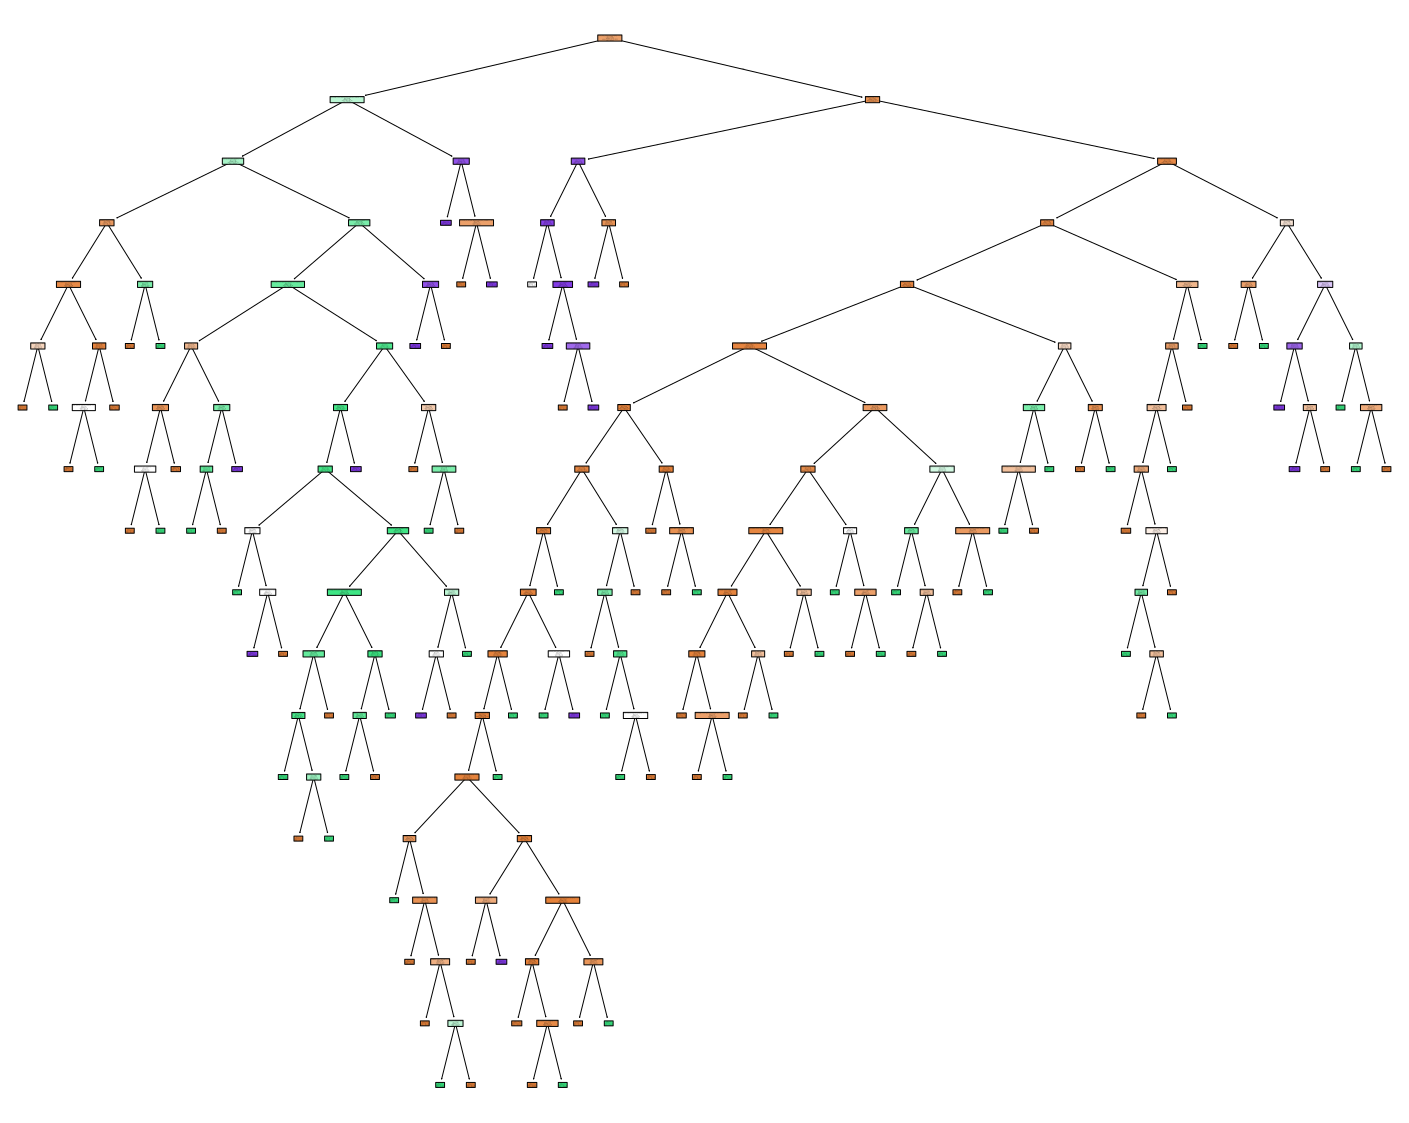

In [33]:
# Name classes
word_names = ["Normal", "Suspect", "Pathological"]

# Visualizing trained decision tree model
fig = plt.figure(figsize = (25,20))
a = tree.plot_tree(decision_tree = clf,
                   max_depth = None,
                   feature_names = train_X.columns,
                   class_names = word_names,
                   filled = True)

# Saving Decision Tree
fig.savefig("fetal_decision_tree.svg", bbox_inches = 'tight')

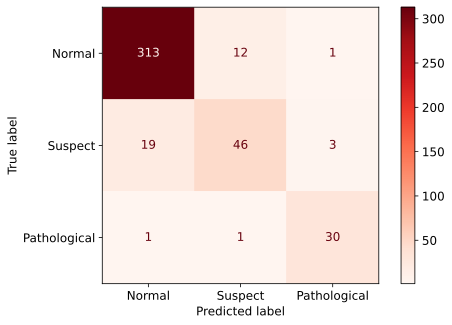

In [34]:
# Predictions on test set
y_pred = clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = word_names)

# Specify figure size
fig, ax = plt.subplots(figsize = (8, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'Reds', ax = ax);

# Save the confusion matrix
plt.savefig("confusion_mat.svg")

In [35]:
# Generating Classification Report
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# Save the report as a CSV File
report_df.to_csv('class_report.csv') 

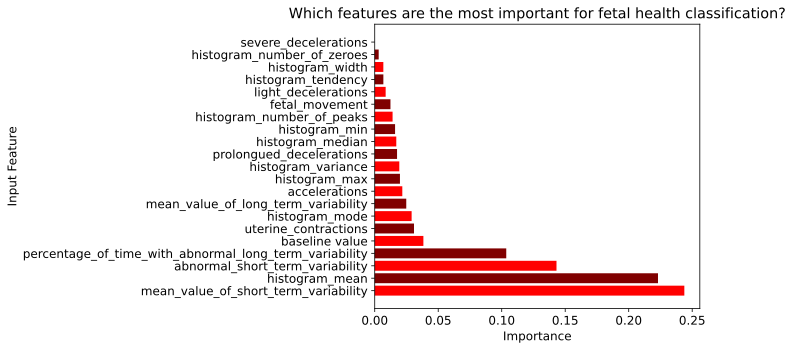

In [36]:
# Storing importance values from the trained model
importance = clf.feature_importances_

# Storing feature importance as a dataframe
dt_feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

dt_feature_imp = dt_feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(dt_feature_imp['Feature'], dt_feature_imp['Importance'], color = ['red', 'maroon'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for fetal health classification?') 
plt.tight_layout()
plt.savefig("dt_feature_imp.svg");

In [37]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_pickle = open('decision_tree_fetal.pickle', 'wb') # wb = "write bytes"

# Write DT model to the file
pickle.dump(clf, dt_pickle) 

# Close the file
dt_pickle.close() 

# **Random Forest Section**

In [38]:
# Import randomforesst 
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Defining prediction model
randfor = RandomForestClassifier(random_state = 0)

# Fitting model on training data
randfor.fit(train_X, train_y)

# Predictions on test set
y_pred = randfor.predict(test_X)

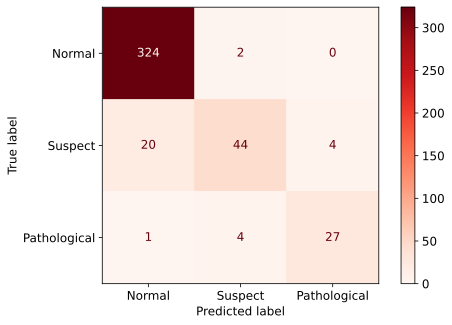

In [40]:
# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = randfor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = word_names)

# Specify figure size
fig, ax = plt.subplots(figsize = (8, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'Reds', ax = ax);

# Save the confusion matrix
plt.savefig("randfor_conf_mat.svg")

In [41]:
# Generating Classification Report
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# Save the report as a CSV File
report_df.to_csv('randfor_class_report.csv') 

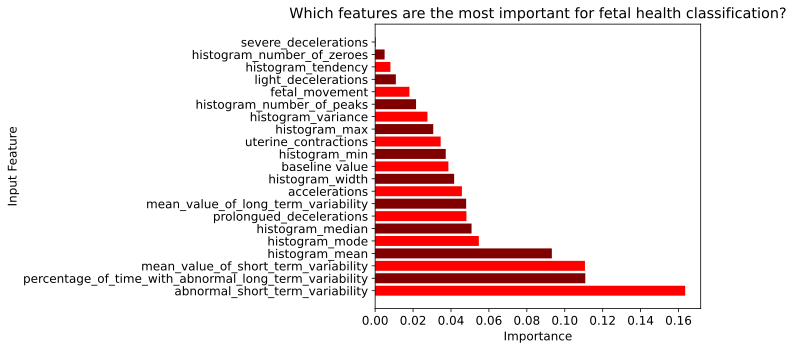

In [42]:
# Storing importance values from the trained model
importance = randfor.feature_importances_

# Storing feature importance as a dataframe
rf_feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

rf_feature_imp = rf_feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(rf_feature_imp['Feature'], rf_feature_imp['Importance'], color = ['red', 'maroon'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for fetal health classification?') 
plt.tight_layout()
plt.savefig("randfor_feature_imp.svg");

In [43]:
# Pickle file: saving the trained RF model
# Creating the file where we want to write the model
rf_pickle = open('random_forest_fetal.pickle', 'wb') # wb = "write bytes"

# Write DT model to the file
pickle.dump(randfor, rf_pickle) 

# Close the file
rf_pickle.close()

# **AdaBoost Section**

In [44]:
# Creating adaboost classifier model
adb = AdaBoostClassifier(random_state=0)

# Fitting model on training data
adb.fit(train_X,train_y)

# Predictions on test set
y_pred = adb.predict(test_X)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


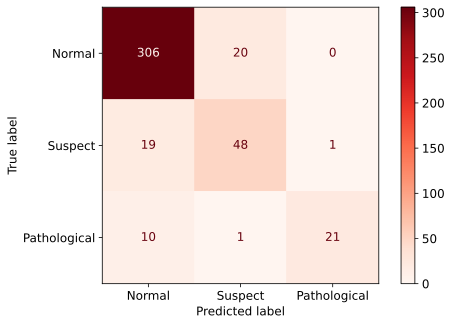

In [45]:
# NOTE: The numbers differ from Puneet's demo
# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = adb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = word_names)

# Specify figure size
fig, ax = plt.subplots(figsize = (8, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'Reds', ax = ax);

# Save the confusion matrix
plt.savefig("adb_conf_mat.svg")

In [46]:
# Generating Classification Report
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# Save the report as a CSV File
report_df.to_csv('adb_class_report.csv') 

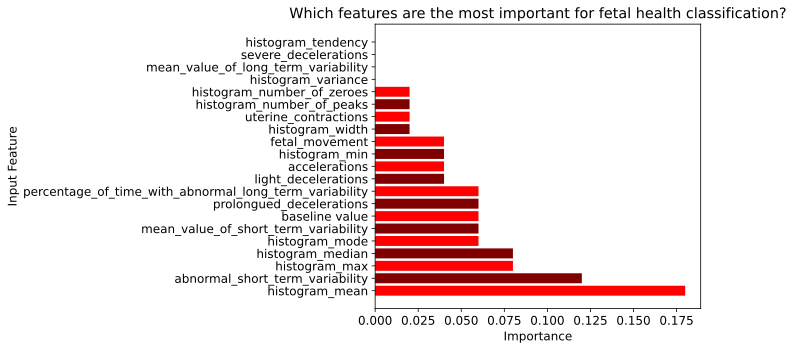

In [47]:
# Storing importance values from the trained model
importance = adb.feature_importances_

# Storing feature importance as a dataframe
adb_feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

adb_feature_imp = adb_feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(adb_feature_imp['Feature'], adb_feature_imp['Importance'], color = ['red', 'maroon'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for fetal health classification?') 
plt.tight_layout()
plt.savefig("adb_feature_imp.svg");

In [48]:
# Pickle file: saving the trained ADB model
# Creating the file where we want to write the model
adb_pickle = open('adb_fetal.pickle', 'wb') # wb = "write bytes"

# Write DT model to the file
pickle.dump(adb, adb_pickle) 

# Close the file
adb_pickle.close()

# **Soft Voting Section**

In [49]:
# Weight Assignment: To give more importance to certain models, use the weights parameter. Calculate the F1 macro scores of each individual ML model, 
# normalize them, and use these values as weights—thereby assigning higher weights to models with better predictive performance

dt_f1 = pd.read_csv('class_report.csv').at[2, "macro avg"]
rf_f1 = pd.read_csv('randfor_class_report.csv').at[2, "macro avg"]
adb_f1 = pd.read_csv('adb_class_report.csv').at[2, "macro avg"]

print("raw weights: ", dt_f1, rf_f1, adb_f1)

# normalized weights
sum_weights = dt_f1 + rf_f1 + adb_f1

dt_f1_norm = dt_f1/sum_weights
rf_f1_norm = rf_f1/sum_weights
adb_f1_norm = adb_f1/sum_weights

print("normalized: ", dt_f1_norm, rf_f1_norm, adb_f1_norm)

raw weights:  0.8611414951252213 0.8562094569318798 0.8014591996283086
normalized:  0.34188424028266134 0.3399261577372018 0.3181896019801368


In [50]:
# Creating soft voting classifier model
voting = VotingClassifier(
    estimators=[("dt", clf), ("rf", randfor), ("adb", adb)],
    voting="soft",
    weights=[dt_f1_norm, rf_f1_norm, adb_f1_norm]
)

# Fitting model on training data
voting = voting.fit(train_X,train_y)

# Predictions on test set
y_pred = voting.predict(test_X)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


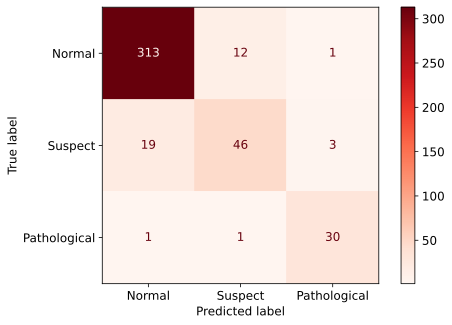

In [51]:
# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = voting.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = word_names)

# Specify figure size
fig, ax = plt.subplots(figsize = (8, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'Reds', ax = ax);

# Save the confusion matrix
plt.savefig("voting_conf_mat.svg")

In [52]:
# Generating Classification Report
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# Save the report as a CSV File
report_df.to_csv('voting_class_report.csv') 

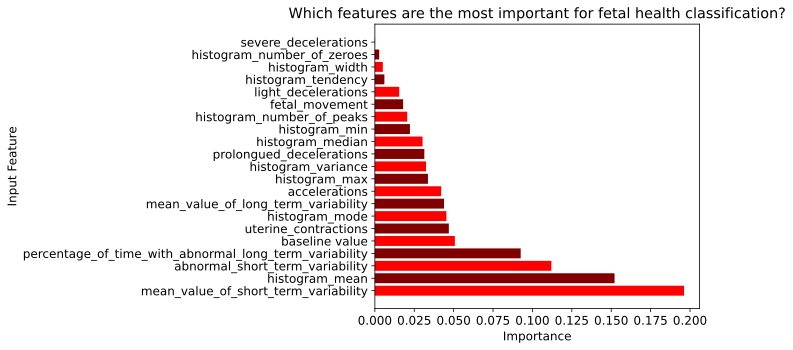

In [53]:
# Creating feature importance plot by hand for soft voting

# Make dataframe with classification reports from DT, RF, and ADB

dt_feature_imp = dt_feature_imp.sort_values(by='Feature')
rf_feature_imp = rf_feature_imp.sort_values(by='Feature')
adb_feature_imp = adb_feature_imp.sort_values(by='Feature')


all_feature_imp_df = pd.DataFrame(columns=["Feature", "DT", "RF", "ADB", "Importance"])
all_feature_imp_df["Feature"] = dt_feature_imp["Feature"]
all_feature_imp_df["DT"] = dt_feature_imp["Importance"]
all_feature_imp_df["RF"] = rf_feature_imp["Importance"]
all_feature_imp_df["ADB"] = adb_feature_imp["Importance"]

all_feature_imp_df["Importance"] = (all_feature_imp_df["DT"].multiply(dt_f1_norm)) + (all_feature_imp_df["RF"].multiply(rf_f1_norm)) + all_feature_imp_df["ADB"].multiply(adb_f1_norm)

voting_feature_imp = all_feature_imp_df.drop(columns=["DT", "RF", "ADB"])
voting_feature_imp = voting_feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# # Storing importance values from the trained model
# importance = voting_feature_imp

# # Storing feature importance as a dataframe
# feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
#                columns = ['Feature', 'Importance'])

# feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)
# feature_imp

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(voting_feature_imp['Feature'], voting_feature_imp['Importance'], color = ['red', 'maroon'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for fetal health classification?') 
plt.tight_layout()
plt.savefig("voting_feature_imp.svg");

In [54]:
# Pickle file: saving the trained ADB model
# Creating the file where we want to write the model
voting_pickle = open('voting_fetal.pickle', 'wb') # wb = "write bytes"

# Write DT model to the file
pickle.dump(voting, voting_pickle) 

# Close the file
voting_pickle.close()